# Climate-Friendly Food Systems (CFFS) Labelling Project

### The University of British Columbia

***

## Part IV: Data Analysis

## Set up and Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import xml.etree.ElementTree as et
from xml.etree.ElementTree import parse
from datetime import datetime

In [2]:
# RUN ONLY ONCE
# os.chdir is used to change the current directory to the specified path
os.chdir("../") # Sets path to the repo folder as it is one level above where this file exists!
path = os.getcwd()
print(path)

/Users/vivaanwadhwa/Documents/GitHub/CFFS_sharon_2024


***
## Import Cleaned Datasets

In [3]:
"""
INPUT: a Dataframe
OUPUT: NONE
Description: Prints a description of the datasets
"""
def DescribeDataset(df):
    print(df.dtypes)
    print("\nShape: ", df.shape)
    display(df.head())

In [4]:
Items = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "AMS_data", "Items_List.csv"))
DescribeDataset(Items)

ItemId             object
Description        object
CaseQty           float64
CaseUOM            object
PakQty            float64
PakUOM             object
InventoryGroup     object
dtype: object

Shape:  (218, 7)


,ItemId,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup
0,I-1927,JALAPENO PEPPER - FRESH,20.0,g,1.25,L,Y
1,I-1958,KETCHUP VOL PAK,660.0,ml,1.25,L,Y
2,I-2025,MUSTARD DRY,22.5,g,1.25,L,Y
3,I-2323,SPICE CAYENNE SHAKER,15.0,ml,1.25,L,Y
4,I-2324,SPICE CHILI POWDER,20.0,g,1.25,L,Y


In [5]:
Ingredients = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "AMS_data", "Ingredients_List.csv"))
DescribeDataset(Ingredients)

IngredientId     object
Qty             float64
Uom              object
Recipe           object
dtype: object

Shape:  (823, 4)


,IngredientId,Qty,Uom,Recipe
0,P-18275,1.0,ea,R-7227
1,P-5506,1.0,ea,R-5554
2,P-17013,2.0,Tbsp,R-5554
3,P-14560,1.0,ea,R-8990
4,P-18295,1.0,ea,R-8428


In [6]:
Preps = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "AMS_data", "Preps_List_Cleaned.csv"))
DescribeDataset(Preps)

PrepId             object
Description        object
PakQty            float64
PakUOM             object
InventoryGroup     object
StdQty            float64
StdUom             object
dtype: object

Shape:  (65, 7)


,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom
0,P-6068,Pro - Kansas City BBQ,1.25,L,Y,1250.0,ml
1,P-2824,2023 Alfredo Sauce Gal.,2250.00,ml,Y,2250.0,ml
2,P-1409,2023 Basmati Prep,2.00,Kg,Y,2000.0,g
3,P-17360,2023 Beef Gravy (prep),4.50,L,Y,4500.0,ml
4,P-16778,2023 Candied walnut,1.00,Kg,Y,1000.0,g


In [7]:
Products = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "AMS_data", "Products_List.csv"))
DescribeDataset(Products)

ProdId         object
Description    object
SalesGroup     object
dtype: object

Shape:  (40, 3)


,ProdId,Description,SalesGroup
0,R-7227,2024S Beets Salad,Y
1,R-5554,2024S Blackend Chick Carbonara,Y
2,R-8990,2024S Chicken Caesar (Wrap),Y
3,R-8428,2024S Chicken Pesto Penne,Y
4,R-10589,2024S Chicken Po'Boy,Y


In [8]:
Conversions = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "AMS_data", "Conversions_Added.csv"))
DescribeDataset(Conversions)

ConversionId       object
Multiplier        float64
ConvertFromQty     object
ConvertFromUom     object
ConvertToQty       object
ConvertToUom       object
dtype: object

Shape:  (164, 6)


,ConversionId,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
0,I-1971,0.003731,0.25,ea,16.75,g
1,I-15803,0.004000,1,can,250,ml
2,I-5505,0.001263,0.25,HEAD,49.5,g
3,I-11706,0.008547,1,ea,117,g
4,I-13308,0.024540,1,ea,40.75,g


In [9]:
mapping = pd.read_csv(os.path.join(os.getcwd(), "data", "mapping", "AMS_data", "Mapping.csv"))
DescribeDataset(mapping)

ItemId                                                     object
CategoryID                                                  int64
Description                                                object
CaseQty                                                   float64
CaseUOM                                                    object
PakQty                                                    float64
PakUOM                                                     object
InventoryGroup                                             object
Food Category_y                                            object
Active Total Supply Chain Emissions (kg CO2 / kg food)    float64
g N lost/kg product                                       float64
Land Use (m^2)                                            float64
Freshwater Withdrawals (L/FU)                             float64
Stress-Weighted Water Use (L/FU)                          float64
dtype: object

Shape:  (532, 14)


,ItemId,CategoryID,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup,Food Category_y,Active Total Supply Chain Emissions (kg CO2 / kg food),g N lost/kg product,Land Use (m^2),Freshwater Withdrawals (L/FU),Stress-Weighted Water Use (L/FU)
0,I-1971,35,LIMES,0.25,ea,1.0,ea,N,citrus fruit,0.3942,2.70,0.00042,37.400,1345.500
1,I-8228,55,Grey Goose 1.14L,1.00,fl oz,1.0,fl oz,N,water & beverages,0.0000,0.00,0.00000,1.000,1.000
2,I-15803,31,Red Bull Watermelon,1.00,can,1.0,can,N,other fruits,0.4306,2.70,0.00071,3.500,4.700
3,I-5505,36,Lettuce - Romaine,0.25,HEAD,1.0,HEAD,N,cabbages and other brassicas (broccoli),0.6220,7.90,0.00230,54.500,2483.400
4,I-8667,58,ITEM GARLIC MAYO,2.00,fl oz,1.0,ml,N,sauces & paste,0.0000,6.75,0.00000,20.225,1134.925


In [10]:
# Check if there are any duplicates in the mapping dataframe, "ItemId" column? False is good.
check = mapping["ItemId"].duplicated().any()
check

False

In [11]:
mapping.loc[mapping["ItemId"] == 'I-2324']

,ItemId,CategoryID,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup,Food Category_y,Active Total Supply Chain Emissions (kg CO2 / kg food),g N lost/kg product,Land Use (m^2),Freshwater Withdrawals (L/FU),Stress-Weighted Water Use (L/FU)
39,I-2324,54,SPICE CHILI POWDER,80.0,g,110.0,g,Y,stimulants & spices misc.,9.3703,6.75,0.031,24.9,220.3


### Unit Converter

In [12]:
# Import standard unit conversion information for items
Std_Unit = pd.read_csv(os.path.join(os.getcwd(), "data", "external", "standard_conversions.csv"))
Std_Unit.head()

,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
0,4.92890,1,tsp,4.92890,ml
1,14.78700,1,Tbsp,14.78700,ml
2,946.35000,1,qt,946.35000,ml
3,473.17625,1,pt,473.17625,ml
4,28.34950,1,oz,28.34950,g


In [13]:
# Import list of prep that need convert uom to standard uom manually
Manual_PrepU = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "update", "AMS_data", "Preps_UpdateUom.csv"))
Manual_PrepU

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom
0,P-14356,[PREP KAPPA MAKI,6.0,PORT,N,1511.82,g
1,P-14560,2023 Chicken Caesar wrap Prep,1.0,ea,Y,433.59,g
2,P-9003,2022 Gallery Burger prep,1.0,ea,N,501.82,g
3,P-17358,2023 Poutine Prep,1.0,ea,N,705.80,g
4,P-15006,2023 Power Punch Salad Prep,1.0,ea,N,416.73,g
...,...,...,...,...,...,...,...
88,P-3045,Greek Salad,1.0,ea,Y,303.20,g
89,P-7201,Harissa Chicken (Marinated),120.0,ea,Y,25300.00,g
90,P-4814,Waffles,55.0,ea,Y,3711.50,g
91,P-18292,2023 Vegan Caesar Wrap Prep,1.0,ea,Y,633.21,g


In [14]:
# NEW CELL ADDED NOV 21 
# For future iterations: Make sure Manual_PrepU has updated units of measurement.
# concatenate Manual_PrepU with Preps:
Preps = pd.concat([Manual_PrepU, Preps], ignore_index=True)

In [15]:
Preps.to_csv("yo.csv", index=False)

In [16]:
# Add unit conversion info for preps into converter
Prep_cov = Manual_PrepU[['PrepId', 'PakQty','PakUOM','StdQty','StdUom']]
Prep_cov.insert(1, "Multiplier", '')
Prep_cov.columns = Conversions.columns

# Prep_cov.loc['Multiplier'] = Prep_cov['ConvertFromQty']/Prep_cov['ConvertToQty']
for index, row in Prep_cov.iterrows():
    # print(Prep_cov.loc[index, 'ConvertFromQty'])
    Prep_cov.loc[index, 'Multiplier'] = Prep_cov.loc[index, 'ConvertFromQty']/Prep_cov.loc[index, 'ConvertToQty']
Prep_cov.head()
Prep_cov.tail()


,ConversionId,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
88,P-3045,0.003298,1.0,ea,303.20,g
89,P-7201,0.004743,120.0,ea,25300.00,g
90,P-4814,0.014819,55.0,ea,3711.50,g
91,P-18292,0.001579,1.0,ea,633.21,g
92,P-2674,0.001319,1.0,ea,758.17,g


In [17]:
# Drop duplicates and concatenate DataFrames: Conversions and Prep_cov to make a DataFrame: frames
frames = [Conversions, Prep_cov]
Conversions = pd.concat(frames).reset_index(drop=True, inplace=False).drop_duplicates()
Conversions.tail()

,ConversionId,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
252,P-3045,0.003298,1.0,ea,303.2,g
253,P-7201,0.004743,120.0,ea,25300.0,g
254,P-4814,0.014819,55.0,ea,3711.5,g
255,P-18292,0.001579,1.0,ea,633.21,g
256,P-2674,0.001319,1.0,ea,758.17,g


In [18]:
# Seperate uoms that converted to 'ml' or 'g'
liquid_unit = Std_Unit.loc[Std_Unit['ConvertToUom'] == 'ml', 'ConvertFromUom'].tolist()
solid_unit = Std_Unit.loc[Std_Unit['ConvertToUom'] == 'g', 'ConvertFromUom'].tolist()

In [19]:
# Construct a standard unit converter
def std_converter(qty, uom):
    if uom in Std_Unit['ConvertFromUom'].tolist():
        multiplier = Std_Unit.loc[Std_Unit['ConvertFromUom'] == uom, 'Multiplier']
        Qty = float(qty)*float(multiplier.iloc[0])
        Uom = Std_Unit.loc[Std_Unit['ConvertFromUom'] == uom, 'ConvertToUom'].values[0]
    else:
        Qty = qty
        Uom = uom
    return (Qty, Uom)

In [20]:
# Construct a unit converter for specific items
spc_cov = list(filter(None, Conversions['ConversionId'].tolist()))
 
def spc_converter(ingre, qty, uom):
    if uom in liquid_unit + solid_unit:
        return std_converter(qty, uom)
    elif ingre in spc_cov:
        conversion = Conversions.loc[(Conversions['ConversionId'] == ingre) & (Conversions['ConvertFromUom'] == uom)
                                    & (Conversions['ConvertToUom'] == 'g')]
        conversion = conversion[conversion['Multiplier'] != 0]

        conversion.drop_duplicates(subset=['ConversionId'], inplace=True)
        multiplier = conversion['Multiplier']
        if multiplier.empty:
            return std_converter(qty, uom)
        else: 
            Qty = float(qty)/float(multiplier.iloc[0])
            Uom = conversion['ConvertToUom'].values[0]
            return (Qty, Uom)
    else:
        return std_converter(qty, uom)

In [21]:
# Test the spc_converter
spc_converter('I-1971', 1, 'g')

(1, 'g')

In [22]:
spc_converter('P-35132', 1, 'ea')

(1, 'ea')

## GHG Factors Calculation for Preps

In [23]:
# Created new columns with emissions factors
Preps['GHG Emission (g)'] = 0
Preps['GHG Emission(g)/StdUom'] = 0
Preps['N lost (g)'] = 0
Preps['N lost (g)/StdUom'] = 0
Preps['Freshwater Withdrawals (ml)'] = 0
Preps['Freshwater Withdrawals (ml)/StdUom'] = 0
Preps['Stress-Weighted Water Use (ml)'] = 0
Preps['Stress-Weighted Water Use (ml)/StdUom'] = 0
Preps['Land Use (m^2)'] = 0
Preps['Land Use (m^2)/StdUom'] = 0

In [24]:
Ingredients.head()

,IngredientId,Qty,Uom,Recipe
0,P-18275,1.0,ea,R-7227
1,P-5506,1.0,ea,R-5554
2,P-17013,2.0,Tbsp,R-5554
3,P-14560,1.0,ea,R-8990
4,P-18295,1.0,ea,R-8428


In [25]:
Preps.loc[Preps["PrepId"] == "P-67984"]

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom,GHG Emission (g),GHG Emission(g)/StdUom,N lost (g),N lost (g)/StdUom,Freshwater Withdrawals (ml),Freshwater Withdrawals (ml)/StdUom,Stress-Weighted Water Use (ml),Stress-Weighted Water Use (ml)/StdUom,Land Use (m^2),Land Use (m^2)/StdUom


In [26]:
Preps.head()

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom,GHG Emission (g),GHG Emission(g)/StdUom,N lost (g),N lost (g)/StdUom,Freshwater Withdrawals (ml),Freshwater Withdrawals (ml)/StdUom,Stress-Weighted Water Use (ml),Stress-Weighted Water Use (ml)/StdUom,Land Use (m^2),Land Use (m^2)/StdUom
0,P-14356,[PREP KAPPA MAKI,6.0,PORT,N,1511.82,g,0,0,0,0,0,0,0,0,0,0
1,P-14560,2023 Chicken Caesar wrap Prep,1.0,ea,Y,433.59,g,0,0,0,0,0,0,0,0,0,0
2,P-9003,2022 Gallery Burger prep,1.0,ea,N,501.82,g,0,0,0,0,0,0,0,0,0,0
3,P-17358,2023 Poutine Prep,1.0,ea,N,705.80,g,0,0,0,0,0,0,0,0,0,0
4,P-15006,2023 Power Punch Salad Prep,1.0,ea,N,416.73,g,0,0,0,0,0,0,0,0,0,0


In [27]:
Preps.to_csv("yo.csv", index=False)

In [28]:
# Changed on Nov 21 2023
def get_items_ghge_prep(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    land = Preps.loc[index, "Land Use (m^2)"]

    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx, 'IngredientId']
        if ingre.startswith('I'):
            ghge_series = mapping.loc[mapping['ItemId'] == ingre, 'Active Total Supply Chain Emissions (kg CO2 / kg food)']
            nitro_fac_series = mapping.loc[mapping['ItemId'] == ingre, 'g N lost/kg product']
            water_fac_series = mapping.loc[mapping['ItemId'] == ingre, 'Freshwater Withdrawals (L/FU)']
            str_water_fac_series = mapping.loc[mapping['ItemId'] == ingre, 'Stress-Weighted Water Use (L/FU)']
            land_fac_series = mapping.loc[mapping["ItemId"] == ingre, "Land Use (m^2)"]

            Qty = float(ingres.loc[idx, 'Qty'])
            Uom = ingres.loc[idx, 'Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
            else:
                qty = std_converter(Qty, Uom)[0]

            if not ghge_series.empty:
                ghg += qty * float(ghge_series.iloc[0])
            if not nitro_fac_series.empty:
                nitro += qty * float(nitro_fac_series.iloc[0]) / 1000
            if not water_fac_series.empty:
                water += qty * float(water_fac_series.iloc[0])
            if not str_water_fac_series.empty:
                str_water += qty * float(str_water_fac_series.iloc[0])
            if not land_fac_series.empty:
                land += qty * float(land_fac_series.iloc[0])

            if Preps.loc[index,"PrepId"] == "P-16782": 
                print(ingre, ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = ghg
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg / weight
    Preps.loc[index, 'N lost (g)'] = nitro
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro / weight
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = water
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water / weight
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = str_water
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water / weight
    Preps.loc[index, 'Land Use (m^2)'] = land
    Preps.loc[index, 'Land Use (m^2)/StdUom'] = land / weight

In [29]:
for index, row in Preps.iterrows():
    get_items_ghge_prep(index , row)

I-16224 107.28355162442593 0.7348188467426433 10178.601803027726 366184.7252934173
I-5505 353.5956028573326 3.8632194974499794 31760.606292084663 1349611.3298461512
I-4161 374.0671168581576 3.9320724974527543 31837.628292087767 1349989.4378461663
I-16699 514.4031168581575 4.404072497452754 32365.628292087767 1352581.4378461663
I-18051 514.4031168581575 4.404072497452754 32365.628292087767 1352581.4378461663


/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_31586/861544063.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '778.8801367611578' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Preps.loc[index, 'GHG Emission (g)'] = ghg
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_31586/861544063.py:41: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.7963517072837423' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg / weight
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_31586/861544063.py:42: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9.294484342464763' has dtype incompatible with in

In [30]:
mapping.loc[mapping["ItemId"] == "I-2324"]

,ItemId,CategoryID,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup,Food Category_y,Active Total Supply Chain Emissions (kg CO2 / kg food),g N lost/kg product,Land Use (m^2),Freshwater Withdrawals (L/FU),Stress-Weighted Water Use (L/FU)
39,I-2324,54,SPICE CHILI POWDER,80.0,g,110.0,g,Y,stimulants & spices misc.,9.3703,6.75,0.031,24.9,220.3


In [31]:
# Calculate GHG, nitro, water footprints per gram/ml of each prep for other preps as ingredients
def get_preps_ghge_prep(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    
    # most recently added
    land = Preps.loc[index, 'Land Use (m^2)']
    
    # print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('P') and len(ingres) > 1:
            ghge = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom']
            if len(ghge) > 1:
                ghge = ghge.iloc[0]
            nitro_fac = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom']
            if len(nitro_fac) > 1:
                nitro_fac = nitro_fac.iloc[0]
            water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom']
            if len(water_fac) > 1:
                water_fac = water_fac.iloc[0]
            str_water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom']
            if len(str_water_fac) > 1:
                str_water_fac = str_water_fac.iloc[0]
            land_fac = Preps.loc[Preps['PrepId'] == ingre, 'Land Use (m^2)/StdUom']
            if len(land_fac) > 1:
                land_fac = land_fac.iloc[0]
            #print(ghge)
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
            
            if ingre == "P-16782":
                print(ingre, ghg, nitro, water, str_water)
            # print(ingre, Qty, Uom, qty, qty*float(ghge))
            # print(ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = float(ghg)
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg/float(weight)
    Preps.loc[index, 'N lost (g)'] = float(nitro)
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro/float(weight)
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water/float(weight)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water/float(weight)
    
    # most recently added
    Preps.loc[index, 'Land Use (m^2)'] = float(land)
    Preps.loc[index, 'Land Use (m^2)/StdUom'] = land / float(weight)

In [32]:
Preps["Freshwater Withdrawals (ml)"].unique()

array([0.00000000e+00, 1.21397993e+05, 2.66930000e+03, 1.27940974e+05,
       2.65366236e+05, 4.09337525e+04, 5.01877998e+04, 1.85559060e+06,
       1.12824564e+05, 1.67993118e+05, 8.55804555e+04, 1.06395256e+05,
       8.73738659e+04, 3.77880000e+06, 6.23356707e+03, 2.04589074e+05,
       3.71513000e+03, 1.57665000e+06, 1.86998962e+06, 4.99926500e+04,
       3.41220726e+04, 1.69772357e+04, 3.23656283e+04, 8.60406782e+03,
       2.13835000e+04, 1.16938375e+05, 1.92959770e+05, 1.74176750e+05,
       4.33800000e+02, 1.03932630e+05, 1.83143000e+03, 1.64587599e+05,
       2.63234010e+03, 2.10300000e+04, 3.79700000e+03, 1.77256439e+04,
       2.45415848e+04, 3.32451425e+05, 2.80054078e+04, 8.09101000e+03,
       1.65570000e+03, 9.66666300e+05, 1.89690046e+05, 1.52181760e+03,
       9.59406782e+03, 8.43400000e+05, 4.22082700e+04, 3.98591300e+04,
       9.24000000e+03, 1.74751390e+04, 1.12369940e+06, 3.93769157e+04,
       1.82411300e+03, 5.56606625e+04, 5.08074097e+05, 2.57530600e+05,
      

In [33]:
# Calculate GHG, nitro, water footprints per gram/ml of each prep for linked preps
def link_preps(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    
    # most recently added
    land = Preps.loc[index, 'Land Use (m^2)']
    
    # Added this print statement July 31
    # print('Index:', index, '\nIngres:\n', ingres)
    if len(ingres) == 1:
        ingre = ingres.iloc[0]['IngredientId']
        if ingre.startswith('P'):
            ghge = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom']
            nitro_fac = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom']
            water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom']
            str_water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom']
            
            # most recently added
            land_fac = Preps.loc[Preps['PrepId'] == ingre, "Land Use (m^2)/StdUom"]
            
            Qty = float(ingres.iloc[0]['Qty'])
            Uom = ingres.iloc[0]['Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
                ghg = qty*float(ghge)
#                 ghg = qty*ghge
                nitro = qty*float(nitro_fac)
                water = qty*float(water_fac)
                str_water = qty*float(str_water_fac)
                # most recently added
                land += qty * float(land_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                ghg = qty*float(ghge)
                nitro = qty*float(nitro_fac)
                water = qty*float(water_fac)
                str_water = qty*float(str_water_fac)
                # most recently added
                land += qty * float(land_fac)
            
            if ingre == "P-16782":
                print(ingre, ghg, nitro, water, str_water)
            # print(ingre, ghge, Qty, Uom, qty, weight)
            # print(ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = float(ghg)
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg/float(weight)
    Preps.loc[index, 'N lost (g)'] = float(nitro)
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro/float(weight)
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water/float(weight)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water/float(weight)
    # most recently added
    Preps.loc[index, 'Land Use (m^2)'] = float(land)
    Preps.loc[index, 'Land Use (m^2)/StdUom'] = land / float(weight)

In [34]:
for index, row in Preps.iterrows():
    link_preps(index, row)

In [35]:
for index, row in Preps.iterrows():
    get_preps_ghge_prep(index, row)

/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_31586/4172213492.py:46: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ghg += qty*float(ghge)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_31586/4172213492.py:47: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  nitro += qty*float(nitro_fac)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_31586/4172213492.py:48: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  water += qty*float(water_fac)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_31586/4172213492.py:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  str_w

In [36]:
Preps.tail(30)

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom,GHG Emission (g),GHG Emission(g)/StdUom,N lost (g),N lost (g)/StdUom,Freshwater Withdrawals (ml),Freshwater Withdrawals (ml)/StdUom,Stress-Weighted Water Use (ml),Stress-Weighted Water Use (ml)/StdUom,Land Use (m^2),Land Use (m^2)/StdUom
128,P-4527,Roasted pepper dip Prep 2024,1.000,Kg,Y,1000.00,g,4318.753294,4.318753,19.577581,0.019578,1.770968e+05,177.096763,6.237252e+06,6237.251755,14.425856,0.014426
129,P-6514,sesame Deressing 2024,300.000,ml,Y,300.00,ml,59.985000,0.199950,1.701000,0.005670,8.592000e+03,28.640000,3.050790e+05,1016.930000,0.090000,0.000300
130,P-12209,2023 Carbonara (sauce),1.000,L,Y,1000.00,ml,7348.550000,7.348550,34.200000,0.034200,9.137000e+04,91.370000,3.236447e+07,32364.468000,8.484000,0.008484
131,P-17037,2023 Chicken Marinate(tenders),5.000,Kg,Y,5000.00,g,23327.342000,4.665468,584.637500,0.116927,1.853951e+06,370.790200,1.689367e+06,337.873400,62.714500,0.012543
132,P-18381,2023 Egplant prep,500.000,g,Y,500.00,g,171.723200,0.343446,1.184400,0.002369,1.529200e+03,3.058400,2.496400e+03,4.992800,0.279820,0.000560
133,P-18575,2023 wings Hot sauce (house),1.650,L,Y,1650.00,ml,313.125000,0.189773,10.317665,0.006253,2.985682e+04,18.095045,1.592171e+06,964.952221,0.125625,0.000076
134,P-2584,2024 Tzatziki,2.250,L,Y,2250.00,ml,3114.922903,1.384410,26.758750,0.011893,2.634154e+05,117.073489,1.300659e+07,5780.706733,2.594075,0.001153
135,P-6881,Aloo Patty,3.500,Kg,Y,453.59,g,2009.917000,4.431132,18.866750,0.041594,9.240000e+03,20.370819,2.685705e+05,592.099694,5.658050,0.012474
136,P-6635,Candy Cane beets Prep 2023,1.000,LBS,Y,453.59,g,965.677623,2.128966,0.093665,0.000206,4.946362e+03,10.904918,3.284017e+04,72.400555,1.955229,0.004311
137,P-10891,Chicken Marinate (Lemon),2.400,Kg,Y,2400.00,g,153.100000,0.063792,3.950000,0.001646,4.951000e+03,2.062917,1.895100e+04,7.896250,0.160000,0.000067


In [37]:
Ingredients.loc[Ingredients["IngredientId"] == "P-18329"]

,IngredientId,Qty,Uom,Recipe
341,P-18329,15.0,ea,P-18272


In [38]:
Preps["GHG Emission (g)"].unique()

array([0.00000000e+00, 1.48322195e+03, 7.49846675e+02, 1.10243286e+03,
       2.27717696e+03, 4.89355148e+02, 6.47093720e+02, 2.48641761e+04,
       5.90356837e+03, 2.06262536e+03, 1.57969681e+04, 1.44839380e+03,
       1.76974208e+03, 1.37051400e+04, 1.75277700e+02, 2.08913056e+03,
       6.86240708e+02, 2.53450000e+03, 2.21877625e+04, 1.51614681e+04,
       4.84957317e+02, 1.74686928e+03, 2.26223058e+03, 3.34827796e+03,
       7.26071024e+02, 1.33328000e+03, 9.25592092e+02, 1.07153376e+03,
       1.72413600e+02, 9.16679170e+02, 3.93496096e+03, 2.61157063e+03,
       9.44792691e+01, 1.24666466e+03, 6.46542000e+02, 7.58104255e+02,
       7.31966955e+02, 1.61390265e+03, 7.25140895e+02, 1.64140000e-01,
       1.75670179e+02, 2.45687810e+03, 1.72167818e+03, 6.32767816e+02,
       3.05514547e+03, 3.04500000e+03, 5.32635640e+02, 7.48851790e+02,
       2.00991700e+03, 3.74565258e+02, 1.13315740e+05, 9.26508240e+03,
       1.99321435e+03, 3.61903804e+03, 1.83567770e+03, 7.57563451e+03,
      

In [39]:
path = os.path.join(os.getcwd(), "data", "final", "AMS_2024_footprints", "Preps Footprints.csv")
Preps.to_csv(path, index = False, header = True)

## GHGe Calculation for Products

In [40]:
Products['Weight (g)'] = 0.00
Products['GHG Emission (g)'] = 0.00
Products['N lost (g)'] = 0.00
Products['Freshwater Withdrawals (ml)'] = 0.00
Products['Stress-Weighted Water Use (ml)'] = 0.00

# most recently added
Products['Land Use (m^2)'] = 0.00

In [41]:
Items["ItemId"].unique()

array(['I-1927', 'I-1958', 'I-2025', 'I-2323', 'I-2324', 'I-2329',
       'I-4105', 'I-4106', 'I-2366', 'I-2640', 'I-2958', 'I-3180',
       'I-4091', 'I-5095', 'I-1783', 'I-13842', 'I-2037', 'I-14484',
       'I-4107', 'I-2181', 'I-4108', 'I-4109', 'I-5204', 'I-13001',
       'I-17991', 'I-1689', 'I-1874', 'I-2068', 'I-2087', 'I-2992',
       'I-13813', 'I-2119', 'I-2951', 'I-4118', 'I-2446', 'I-2378',
       'I-4119', 'I-2367', 'I-16224', 'I-5505', 'I-13691', 'I-5777',
       'I-13308', 'I-3354', 'I-14948', 'I-5220', 'I-4124', 'I-4125',
       'I-4127', 'I-5126', 'I-4128', 'I-4129', 'I-4131', 'I-1908',
       'I-4132', 'I-3804', 'I-6461', 'I-7645', 'I-12361', 'I-14977',
       'I-4133', 'I-3258', 'I-7980', 'I-14556', 'I-1588', 'I-5803',
       'I-4134', 'I-4135', 'I-1782', 'I-14422', 'I-2203', 'I-4014',
       'I-10955', 'I-5731', 'I-4139', 'I-4140', 'I-3005', 'I-2183',
       'I-6203', 'I-17946', 'I-4141', 'I-5575', 'I-2066', 'I-2443',
       'I-16144', 'I-6204', 'I-2402', 'I-1635',

In [42]:
Products.head()

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Freshwater Withdrawals (ml),Stress-Weighted Water Use (ml),Land Use (m^2)
0,R-7227,2024S Beets Salad,Y,0.0,0.0,0.0,0.0,0.0,0.0
1,R-5554,2024S Blackend Chick Carbonara,Y,0.0,0.0,0.0,0.0,0.0,0.0
2,R-8990,2024S Chicken Caesar (Wrap),Y,0.0,0.0,0.0,0.0,0.0,0.0
3,R-8428,2024S Chicken Pesto Penne,Y,0.0,0.0,0.0,0.0,0.0,0.0
4,R-10589,2024S Chicken Po'Boy,Y,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# Calculate GHG, nitro, water footprints per gram/ml of each product for items ingredients only
from sympy import Q


def get_items_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index, 'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']

    # most recently added
    land = Products.loc[index, "Land Use (m^2)"]

    # print('Index:', index, '\nIngres:\n', ingres)
    
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx, 'IngredientId']
        # Check if the ingredient is present in the mapping
        mapping_ingre = mapping.loc[mapping['ItemId'] == ingre]
        if not mapping_ingre.empty:
            ghge = mapping_ingre['Active Total Supply Chain Emissions (kg CO2 / kg food)'].iloc[0]
            nitro_fac = mapping_ingre['g N lost/kg product'].iloc[0]
            water_fac = mapping_ingre['Freshwater Withdrawals (L/FU)'].iloc[0]
            str_water_fac = mapping_ingre['Stress-Weighted Water Use (L/FU)'].iloc[0]
            land_fac = mapping_ingre["Land Use (m^2)"].iloc[0]

            Qty = float(ingres.loc[idx, 'Qty'])
            Uom = ingres.loc[idx, 'Uom']
            if ingre in Conversions['ConversionId'].tolist():
                qty = spc_converter(ingre, Qty, Uom)[0]
            else:
                qty = std_converter(Qty, Uom)[0]
            weight += qty
            ghg += qty * float(ghge)
            nitro += qty * float(nitro_fac) / 1000
            water += qty * float(water_fac)
            str_water += qty * float(str_water_fac)
            land += qty * float(land_fac)
            if ingres.loc[idx, 'Recipe'] == "R-16782":
                print(mapping_ingre)

    Products.loc[index, 'GHG Emission (g)'] = float(ghg)
    Products.loc[index, 'Weight (g)'] = float(weight)
    Products.loc[index, 'N lost (g)'] = float(nitro)
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    # most recently added
    Products.loc[index, 'Land Use (m^2)'] = float(land)

In [44]:
# Calculate GHG, nitro, water footprints per gram/ml of each product for preps ingredients only

# New function below ommits type error of cannot convert the series to <class 'float'>
def get_preps_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index,'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']
    land = Products.loc[index, "Land Use (m^2)"]
    
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('P'):
            # Check if the Series is empty and handle accordingly
            ghge_series = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom']
            nitro_fac_series = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom']
            water_fac_series = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom']
            str_water_fac_series = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom']
            land_fac_series = Preps.loc[Preps["PrepId"] == ingre, "Land Use (m^2)/StdUom"]

            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in Conversions['ConversionId'].tolist():
                qty = spc_converter(ingre, Qty, Uom)[0]
            else:
                qty = std_converter(Qty, Uom)[0]
                            
            weight += qty
            ghg += qty * float(ghge_series.iloc[0]) if not ghge_series.empty else 0
            nitro += qty * float(nitro_fac_series.iloc[0]) if not nitro_fac_series.empty else 0
            water += qty * float(water_fac_series.iloc[0]) if not water_fac_series.empty else 0
            str_water += qty * float(str_water_fac_series.iloc[0]) if not str_water_fac_series.empty else 0
            land += qty * float(land_fac_series.iloc[0]) if not land_fac_series.empty else 0

            if ingres.loc[idx, 'Recipe'] == "R-16782":
                print(ingre)

    Products.loc[index, 'GHG Emission (g)'] = ghg
    Products.loc[index, 'Weight (g)'] = weight
    Products.loc[index, 'N lost (g)'] = nitro
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = water
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = str_water
    Products.loc[index, 'Land Use (m^2)'] = land

In [45]:
for index, row in Products.iterrows():
    get_preps_ghge(index, row)
    get_items_ghge(index, row)

P-16782


In [46]:
Ingredients.loc[Ingredients["Recipe"] == "R-5010"]

,IngredientId,Qty,Uom,Recipe
58,P-5012,2.0,ea,R-5010


In [47]:
def get_products_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index, 'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']
    
    # most recently added
    land = Products.loc[index, 'Land Use (m^2)']
    
    # print('Index:', index, '\nIngres:\n', ingres)
    # print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx, 'IngredientId']
        if ingre.startswith('R'):
            mapping_ingre = Products.loc[Products['ProdId'] == ingre]
            if not mapping_ingre.empty:
                ghge = mapping_ingre['GHG Emission (g)'].iloc[0]
                nitro_fac = mapping_ingre['N lost (g)'].iloc[0]
                water_fac = mapping_ingre['Freshwater Withdrawals (ml)'].iloc[0]
                str_water_fac = mapping_ingre['Stress-Weighted Water Use (ml)'].iloc[0]
                
                # most recently added
                land_fac = mapping_ingre["Land Use (m^2)"].iloc[0]
                
                Weight = mapping_ingre['Weight (g)'].iloc[0]
                Qty = float(ingres.loc[idx, 'Qty'])
                ghg += Qty * float(ghge)
                nitro += Qty * float(nitro_fac)
                water += Qty * float(water_fac)
                str_water += Qty * float(str_water_fac)
                weight += Qty * float(Weight)
                # print(ingre, Qty, float(ghge), Qty*float(ghge))
                # print(ingre, Qty, float(ghge), Qty*float(ghge))
    Products.loc[index, 'GHG Emission (g)'] = float(ghg)
    Products.loc[index, 'Weight (g)'] = float(weight)
    Products.loc[index, 'N lost (g)'] = float(nitro)
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    
    # most recently added
    Products.loc[index, 'Land Use (m^2)'] = float(land)

In [48]:
for index, row in Products.iterrows():
    get_products_ghge(index, row)

In [49]:
# ONLY RUN CELL IF NOT ALL PREPS have standardized units after manual changes
# # Filter out products using preps with unknown units
# Preps_Nonstd = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "AMS_data", "Preps_NonstdUom.csv"))
# Preps_Nonstd

In [50]:
# # ONLY RUN CELL IF NOT ALL PREPS have standardized units after manual changes
# def filter_products(index, row):
#     ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index,'ProdId']]
#     #print(ingres)
#     for idx, row in ingres.iterrows():
#         ingre = ingres.loc[idx,'IngredientId']
#         if ingre in Preps_Nonstd['PrepId'].tolist():
#             print(ingre, index, Products.loc[index,'ProdId'])
#             Products.drop(index, inplace=True)
#             break

In [51]:
# # ONLY RUN CELL IF NOT ALL PREPS have standardized units after manual changes
# for index, row in Products.iterrows():
#     filter_products(index, row)

In [52]:
Products

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Freshwater Withdrawals (ml),Stress-Weighted Water Use (ml),Land Use (m^2)
0,R-7227,2024S Beets Salad,Y,384.000000,647.093720,6.353698,7.633522e+04,4.117096e+06,1.297368
1,R-5554,2024S Blackend Chick Carbonara,Y,624.842000,15897.638562,157.276942,3.918222e+06,1.227638e+08,48.412277
2,R-8990,2024S Chicken Caesar (Wrap),Y,433.590000,1483.221954,24.299566,1.696792e+05,5.072550e+06,3.905403
3,R-8428,2024S Chicken Pesto Penne,Y,641.933500,6004.237167,111.410988,6.140507e+05,2.100212e+07,14.238672
4,R-10589,2024S Chicken Po'Boy,Y,873.523300,1769.742083,33.144580,1.802420e+05,3.997047e+06,4.776946
5,R-14525,2024S Gallery Nachos,Y,567.405531,2089.130563,15.369643,2.064799e+05,1.256319e+07,3.309799
6,R-6977,2024S Grilled Caesar (Salad),Y,358.826571,1448.393802,25.951760,1.631561e+05,4.468334e+06,3.602459
7,R-14296,2024S Hummus,Y,309.309999,854.081220,3.782210,8.229143e+04,2.727380e+06,2.630480
8,R-3664,2024S Poutine,Y,705.900000,749.896965,3.678435,1.283220e+04,1.162638e+06,1.886588
9,R-7065,2024S Power Punch,Y,416.730000,1102.432864,4.201757,1.564274e+05,1.027002e+07,2.844937


In [53]:
Products['Freshwater Withdrawals (L)'] = round(Products['Freshwater Withdrawals (ml)']/1000, 2)
Products['Stress-Weighted Water Use (L)'] = round(Products['Stress-Weighted Water Use (ml)']/1000, 2)
Products = Products.drop(columns=['Freshwater Withdrawals (ml)', 'Stress-Weighted Water Use (ml)'])

In [54]:
Products['GHG Emission (g) / 100g'] = round(100*Products['GHG Emission (g)']/Products['Weight (g)'], 2)
Products['N lost (g) / 100g'] = round(100*Products['N lost (g)']/Products['Weight (g)'], 2)
Products['Freshwater Withdrawals (L) / 100g'] = round(100*Products['Freshwater Withdrawals (L)']/Products['Weight (g)'], 2)
Products['Stress-Weighted Water Use (L) / 100g'] = round(100*Products['Stress-Weighted Water Use (L)']/Products['Weight (g)'], 2)

# most recently added
Products['Land Use (m^2) / 100g'] = round(100 * Products['Land Use (m^2)'] / Products['Weight (g)'], 2)

In [55]:
Products

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Land Use (m^2),Freshwater Withdrawals (L),Stress-Weighted Water Use (L),GHG Emission (g) / 100g,N lost (g) / 100g,Freshwater Withdrawals (L) / 100g,Stress-Weighted Water Use (L) / 100g,Land Use (m^2) / 100g
0,R-7227,2024S Beets Salad,Y,384.000000,647.093720,6.353698,1.297368,76.34,4117.10,168.51,1.65,19.88,1072.16,0.34
1,R-5554,2024S Blackend Chick Carbonara,Y,624.842000,15897.638562,157.276942,48.412277,3918.22,122763.85,2544.27,25.17,627.07,19647.18,7.75
2,R-8990,2024S Chicken Caesar (Wrap),Y,433.590000,1483.221954,24.299566,3.905403,169.68,5072.55,342.08,5.60,39.13,1169.90,0.90
3,R-8428,2024S Chicken Pesto Penne,Y,641.933500,6004.237167,111.410988,14.238672,614.05,21002.12,935.34,17.36,95.66,3271.70,2.22
4,R-10589,2024S Chicken Po'Boy,Y,873.523300,1769.742083,33.144580,4.776946,180.24,3997.05,202.60,3.79,20.63,457.58,0.55
5,R-14525,2024S Gallery Nachos,Y,567.405531,2089.130563,15.369643,3.309799,206.48,12563.19,368.19,2.71,36.39,2214.15,0.58
6,R-6977,2024S Grilled Caesar (Salad),Y,358.826571,1448.393802,25.951760,3.602459,163.16,4468.33,403.65,7.23,45.47,1245.26,1.00
7,R-14296,2024S Hummus,Y,309.309999,854.081220,3.782210,2.630480,82.29,2727.38,276.12,1.22,26.60,881.76,0.85
8,R-3664,2024S Poutine,Y,705.900000,749.896965,3.678435,1.886588,12.83,1162.64,106.23,0.52,1.82,164.70,0.27
9,R-7065,2024S Power Punch,Y,416.730000,1102.432864,4.201757,2.844937,156.43,10270.02,264.54,1.01,37.54,2464.43,0.68


In [56]:
Products.shape

(40, 14)

In [57]:
path = os.path.join(os.getcwd(), "data", "final", "AMS_2024_footprints", "Recipes Footprints.csv")
Products.to_csv(path, index = False, header = True)

## Data Visualization

In [58]:
path = os.path.join(os.getcwd(), "reports", "figures/")

<Axes: >

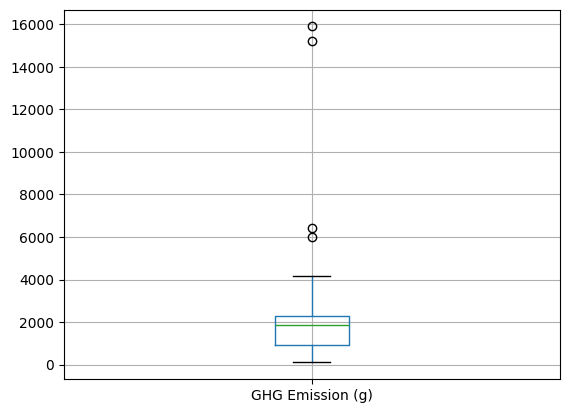

In [59]:
Products.boxplot(column=['GHG Emission (g)'], return_type='axes')

In [60]:
Products.boxplot(column=['N lost (g)'], return_type='axes')

<Axes: >

In [61]:
Products.boxplot(column=['Freshwater Withdrawals (L)'], return_type='axes')

<Axes: >

In [62]:
Products.boxplot(column=['Stress-Weighted Water Use (L)'], return_type='axes')

<Axes: >

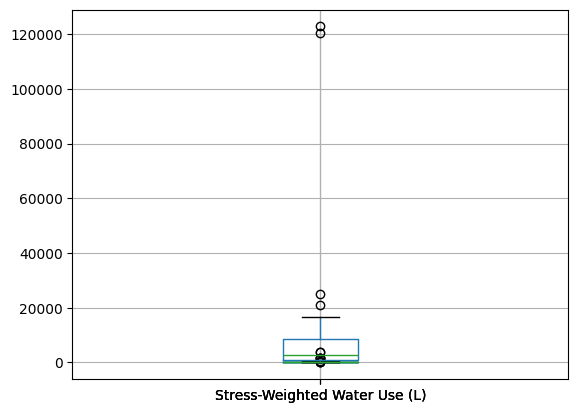

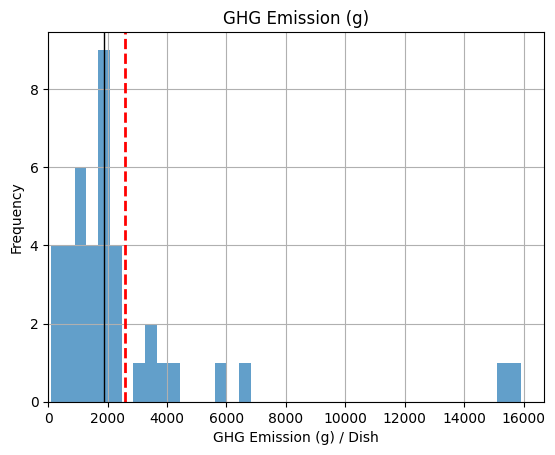

In [63]:
# These figures were not loading earlier because there were not any folders for the path required, so now that is working
Products.hist(column=['GHG Emission (g)'], bins= 40, alpha = 0.7)
plt.axvline(Products['GHG Emission (g)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['GHG Emission (g)'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('GHG Emission (g) / Dish')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.savefig(path + 'GHGe_dish.png')
plt.show()

In [64]:
# Using isna() or isnull() to find NaN values in 'GHG Emission (g) / 100g' column
rows_with_nan = Products[Products['GHG Emission (g) / 100g'].isna()]

# Display the rows containing NaN values
print(rows_with_nan)


Empty DataFrame
Columns: [ProdId, Description, SalesGroup, Weight (g), GHG Emission (g), N lost (g), Land Use (m^2), Freshwater Withdrawals (L), Stress-Weighted Water Use (L), GHG Emission (g) / 100g, N lost (g) / 100g, Freshwater Withdrawals (L) / 100g, Stress-Weighted Water Use (L) / 100g, Land Use (m^2) / 100g]
Index: []


In [65]:
# Products.hist(column=['N lost (g)'], bins= 40, alpha = 0.7)
# plt.axvline(Products['N lost (g)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['N lost (g)'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('N lost (g) / Dish')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'N lost_dish.png')
# plt.show()

In [66]:
# Products.hist(column=['N lost (g) / 100g'], bins= 40, alpha = 0.7)
# plt.axvline(Products['N lost (g) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['N lost (g) / 100g'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('N lost (g) / 100g')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'N lost_100g.png')
# plt.show()

In [67]:
# Products.hist(column=['Freshwater Withdrawals (L)'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Freshwater Withdrawals (L)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Freshwater Withdrawals (L)'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Freshwater Withdrawals (L) / Dish')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Fresh water_dish.png')
# plt.show()

In [68]:
# Products.hist(column=['Freshwater Withdrawals (L) / 100g'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Freshwater Withdrawals (L) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Freshwater Withdrawals (L) / 100g'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Freshwater Withdrawals (L) / 100g')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Fresh water_100g.png')
# plt.show()

In [69]:
# Products.hist(column=['Stress-Weighted Water Use (L)'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Stress-Weighted Water Use (L)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Stress-Weighted Water Use (L)'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Stress-Weighted Water Use (L) / Dish')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Stress water_dish.png')
# plt.show()

In [70]:
# Products.hist(column=['Stress-Weighted Water Use (L) / 100g'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Stress-Weighted Water Use (L) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Stress-Weighted Water Use (L) / 100g'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Stress-Weighted Water Use (L) / 100g')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Stress water_100g.png')
# plt.show()

In [71]:
# Products.hist(column=['Land Use (m^2)'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Land Use (m^2)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Land Use (m^2)'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Land Use (m^2) / Dish')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Land_Use_(m^2).png')
# plt.show()

In [72]:
# Products.hist(column=['Land Use (m^2) / 100g'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Land Use (m^2) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Land Use (m^2) / 100g'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Land Use (m^2) / 100g')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Land_Use_(m^2)_per_100g.png')
# plt.show()

In [73]:
Products

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Land Use (m^2),Freshwater Withdrawals (L),Stress-Weighted Water Use (L),GHG Emission (g) / 100g,N lost (g) / 100g,Freshwater Withdrawals (L) / 100g,Stress-Weighted Water Use (L) / 100g,Land Use (m^2) / 100g
0,R-7227,2024S Beets Salad,Y,384.000000,647.093720,6.353698,1.297368,76.34,4117.10,168.51,1.65,19.88,1072.16,0.34
1,R-5554,2024S Blackend Chick Carbonara,Y,624.842000,15897.638562,157.276942,48.412277,3918.22,122763.85,2544.27,25.17,627.07,19647.18,7.75
2,R-8990,2024S Chicken Caesar (Wrap),Y,433.590000,1483.221954,24.299566,3.905403,169.68,5072.55,342.08,5.60,39.13,1169.90,0.90
3,R-8428,2024S Chicken Pesto Penne,Y,641.933500,6004.237167,111.410988,14.238672,614.05,21002.12,935.34,17.36,95.66,3271.70,2.22
4,R-10589,2024S Chicken Po'Boy,Y,873.523300,1769.742083,33.144580,4.776946,180.24,3997.05,202.60,3.79,20.63,457.58,0.55
5,R-14525,2024S Gallery Nachos,Y,567.405531,2089.130563,15.369643,3.309799,206.48,12563.19,368.19,2.71,36.39,2214.15,0.58
6,R-6977,2024S Grilled Caesar (Salad),Y,358.826571,1448.393802,25.951760,3.602459,163.16,4468.33,403.65,7.23,45.47,1245.26,1.00
7,R-14296,2024S Hummus,Y,309.309999,854.081220,3.782210,2.630480,82.29,2727.38,276.12,1.22,26.60,881.76,0.85
8,R-3664,2024S Poutine,Y,705.900000,749.896965,3.678435,1.886588,12.83,1162.64,106.23,0.52,1.82,164.70,0.27
9,R-7065,2024S Power Punch,Y,416.730000,1102.432864,4.201757,2.844937,156.43,10270.02,264.54,1.01,37.54,2464.43,0.68


In [74]:
Products.to_csv("data/preprocessed/AMS_data/Products_List.csv", index = False)
